In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from keras.preprocessing.image import load_img, ImageDataGenerator
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.callbacks import EarlyStopping

In [2]:
IMAGE_SIZE = [224,224]

train_path = '/content/Covid_Dataset/Train'
test_path = '/content/Covid_Dataset/Test'

In [33]:
train_datagen = ImageDataGenerator(
                                   rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True
                               )

test_datagen = ImageDataGenerator(rescale=1./255)

In [34]:
train = train_datagen.flow_from_directory(
                                           train_path + '/' ,
                                           target_size=(224,224),
                                           batch_size=32,
                                           class_mode="categorical"
                                  )

test = test_datagen.flow_from_directory(
                                         test_path,
                                         target_size=(224,224),
                                         batch_size=32,
                                         class_mode="categorical",

                                  )

Found 1189 images belonging to 2 classes.
Found 187 images belonging to 2 classes.


In [ ]:
/content/Covid_Dataset/Train/With Mask/1-with-mask.jpg

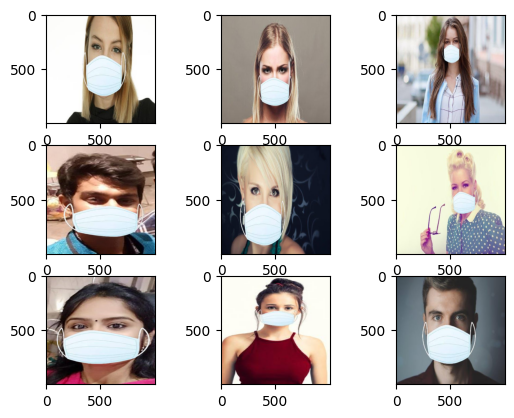

In [35]:
for i in range(1,10):
  plt.subplot(3,3,i)
  img = load_img("/content/Covid_Dataset/Train/With Mask/"+ str(i) +"-with-mask.jpg",target_size=(1000,1000))
  plt.imshow(img)
plt.show()

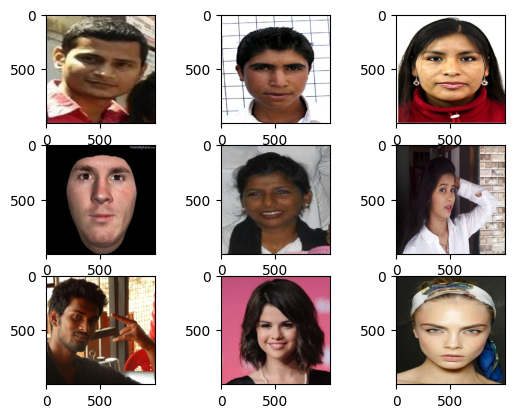

In [36]:
for i in range(1,10):
  plt.subplot(3,3,i)
  img = load_img("/content/Covid_Dataset/Train/Without Mask/" + str(i) + ".jpg",target_size=(1000,1000))
  plt.imshow(img)
plt.show()

In [37]:
mobilenet = MobileNetV2(
                        input_shape= IMAGE_SIZE + [3],
                        weights="imagenet",
                        include_top=False
                    )

In [38]:
for layer in mobilenet.layers:
  layer.trainable = False

In [39]:
folders = glob(train_path + '/*')
len(folders)

2

In [40]:
x = Flatten()(mobilenet.output)

In [41]:
pred = Dense(len(folders),activation='softmax')(x)

In [42]:
model = Model(inputs=mobilenet.input, outputs=pred)

In [43]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']      

In [44]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

In [45]:
early = EarlyStopping(monitor='val_loss',
                      min_delta=0,
                      patience=3,
                      verbose=1,
                      restore_best_weights=True

                 )

In [46]:
model_history = model.fit_generator(
                                    train,
                                    validation_data=test,
                                    epochs=30,
                                    steps_per_epoch=len(train),
                                    validation_steps=len(test),
                                    callbacks=early
                                    )

<ipython-input-46-b0a4724d46ea>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history = model.fit_generator(


Epoch 1/30
38/38 [==============================] - 22s 493ms/step - loss: 0.2194 - accuracy: 0.9664 - val_loss: 0.1014 - val_accuracy: 0.9947
Epoch 2/30
38/38 [==============================] - 17s 432ms/step - loss: 0.0490 - accuracy: 0.9950 - val_loss: 0.1981 - val_accuracy: 0.9947
Epoch 3/30
38/38 [==============================] - 16s 418ms/step - loss: 0.1390 - accuracy: 0.9907 - val_loss: 0.1737 - val_accuracy: 0.9893
Epoch 4/30
38/38 [==============================] - 17s 453ms/step - loss: 0.0527 - accuracy: 0.9933 - val_loss: 0.0092 - val_accuracy: 0.9947
Epoch 5/30
38/38 [==============================] - 16s 421ms/step - loss: 0.0871 - accuracy: 0.9966 - val_loss: 0.0055 - val_accuracy: 0.9947
Epoch 6/30
38/38 [==============================] - 17s 452ms/step - loss: 0.0417 - accuracy: 0.9966 - val_loss: 3.1036e-06 - val_accuracy: 1.0000
Epoch 7/30
38/38 [==============================] - 16s 420ms/step - loss: 0.0044 - accuracy: 0.9983 - val_loss: 1.0200e-07 - val_accuracy

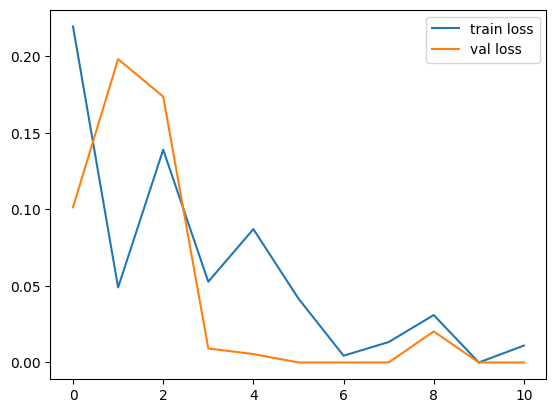

<Figure size 640x480 with 0 Axes>

In [47]:
# Loss

plt.plot(model_history.history['loss'],label='train loss')
plt.plot(model_history.history['val_loss'],label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

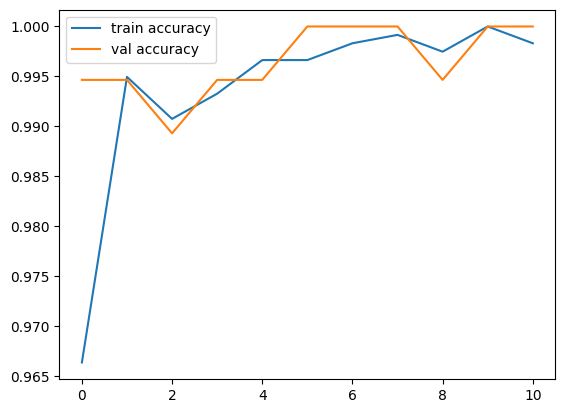

<Figure size 640x480 with 0 Axes>

In [50]:
# Accuracy

plt.plot(model_history.history['accuracy'],label='train accuracy')
plt.plot(model_history.history['val_accuracy'],label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [51]:
model.save('Covid.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [31]:
import os
dir = os.listdir('/content/Covid_Dataset/Test')
print(dir)

['With Mask', 'Without Mask']


In [29]:
rm -rf `find -type d -name .ipynb_checkpoints`